## turn stats

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import netCDF4 as nc
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
import glob
import os
import xarray as xr
import datetime
from salishsea_tools import viz_tools, tidetools, geo_tools, gsw_calls, wind_tools
import pickle
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [46]:
vmax = 1
cmap2 = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'lightskyblue'),
                                                    (0.85 / vmax, 'lightskyblue'),
                                                    (0.850001 / vmax, 'bisque'),
                                                    (1 / vmax, 'bisque')]
                                        )

In [52]:
cmap = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'tab:pink'),
                                                    (0.3 / vmax, 'tab:pink'),
                                                    (0.30001 / vmax, 'tab:red'),
                                                    (0.55 / vmax, 'tab:red'),
                                                    (0.550001 / vmax, 'tab:green'),
                                                    (0.85 / vmax, 'tab:green'),
                                                    (0.850001 / vmax, 'tab:blue'),
                                                    (1 / vmax, 'tab:blue')]
                                        )

green_patch = mpatches.Patch(color='tab:pink', label='1/4 runs')
red_patch = mpatches.Patch(color='tab:red', label='2/4 runs')
yellow_patch = mpatches.Patch(color='tab:green', label='3/4 runs')
blue_patch = mpatches.Patch(color='tab:blue', label='4/4 runs')

In [43]:
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
bathy, X, Y = tidetools.get_bathy_data(grid)

In [5]:
wind_grid = nc.Dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaAtmosphereGridV1')

In [6]:
geo_tools.find_closest_model_point(-123.24, 48.69, wind_grid['longitude'][:]-360, wind_grid['latitude'][:],
                                   grid = 'GEM2.5')

(116, 150)

In [7]:
wind_data = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1')

In [8]:
time_slice = slice('2015-01-01 00:00:00', '2019-01-01 00:00:00')

In [9]:
u_winds = wind_data.u_wind.isel(gridY=116, gridX=150).sel(time=time_slice).data
v_winds = wind_data.v_wind.isel(gridY=116, gridX=150).sel(time=time_slice).data

In [10]:
times = wind_data.time.sel(time=time_slice).data

In [11]:
times.shape

(35065,)

In [12]:
u_winds.shape

(35065,)

In [13]:
wind_speed, wind_dir = wind_tools.wind_speed_dir(u_winds, v_winds)

In [15]:
wnd_dir_avg = np.array([])
wnd_dir_min = np.array([])
wnd_dir_max = np.array([])
wnd_dir_std = np.array([])

for i in range(1450):
    start = 24*i
    end = start + 168
    wnd_dir_avg = np.append(wnd_dir_avg, wind_dir[start:end].mean())
    wnd_dir_min = np.append(wnd_dir_min, wind_dir[start:end].min())
    wnd_dir_max = np.append(wnd_dir_max, wind_dir[start:end].max())
    wnd_dir_std = np.append(wnd_dir_std, wind_dir[start:end].std())

In [16]:
wnd_spd_avg = np.array([])
wnd_spd_min = np.array([])
wnd_spd_max = np.array([])
wnd_spd_std = np.array([])

for i in range(1450):
    start = 24*i
    end = start + 168
    wnd_spd_avg = np.append(wnd_spd_avg, wind_speed[start:end].mean())
    wnd_spd_min = np.append(wnd_spd_min, wind_speed[start:end].min())
    wnd_spd_max = np.append(wnd_spd_max, wind_speed[start:end].max())
    wnd_spd_std = np.append(wnd_spd_std, wind_speed[start:end].std())

In [17]:
pickle_in1 = open("/home/abhudia/Desktop/current speed/hourly/mag2015.pickle","rb")
pickle_in2 = open("/home/abhudia/Desktop/current speed/hourly/mag2016.pickle","rb")
pickle_in3 = open("/home/abhudia/Desktop/current speed/hourly/mag2017.pickle","rb")
pickle_in4 = open("/home/abhudia/Desktop/current speed/hourly/mag2018.pickle","rb")
example1 = pickle.load(pickle_in1)
example2 = pickle.load(pickle_in2)
example3 = pickle.load(pickle_in3)
example4 = pickle.load(pickle_in4)

In [18]:
two = np.append(example1[:,143,240], example2[:,143,240])
three = np.append(two, example3[:,143,240])
fullc = np.append(three, example4[:,143,240])
fullc.shape

(35064,)

In [19]:
dates2 = np.array([datetime.datetime(2015,1,1,0,30) + datetime.timedelta(hours = i) for i in range(35064)])

In [20]:
month_of_data = np.array([dates2[a].month for a in range(35064)])

In [21]:
cur_avg = np.array([])
cur_min = np.array([])
cur_max = np.array([])
cur_std = np.array([])

for i in range(1450):
    start = 24*i
    end = start + 168
    cur_avg = np.append(cur_avg, fullc[start:end].mean())
    cur_min = np.append(cur_min, fullc[start:end].min())
    cur_max = np.append(cur_max, fullc[start:end].max())
    cur_std = np.append(cur_std, fullc[start:end].std())

In [22]:
wind_dir.shape

(35065,)

In [23]:
wind_dir2 = wind_dir[:-1]
wind_speed2 = wind_speed[:-1]

In [24]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

dates = np.array([datetime.date(2015,1,1) + datetime.timedelta(i) for i in range(1450)])
dates.shape

(1450,)

In [25]:
print("overall mean for current = " + str(fullc.mean()))
print("overall mean for wind dir = " + str(wind_dir2.mean()))
print("overall mean for wind speed = " + str(wind_speed2.mean()))

overall mean for current = 1.1928312
overall mean for wind dir = 173.4288491714636
overall mean for wind speed = 4.281274


In [36]:
swh_ts = pickle.load(open('/ocean/vdo/MIDOSS/tp_swh.pkl', 'rb'))

In [37]:
swh_ts.shape

(70176,)

In [38]:
swh_avg = np.array([])

for i in range(1450):
    start = 24*i
    end = start + 168
    swh_avg = np.append(swh_avg, swh_ts[start:end].mean())

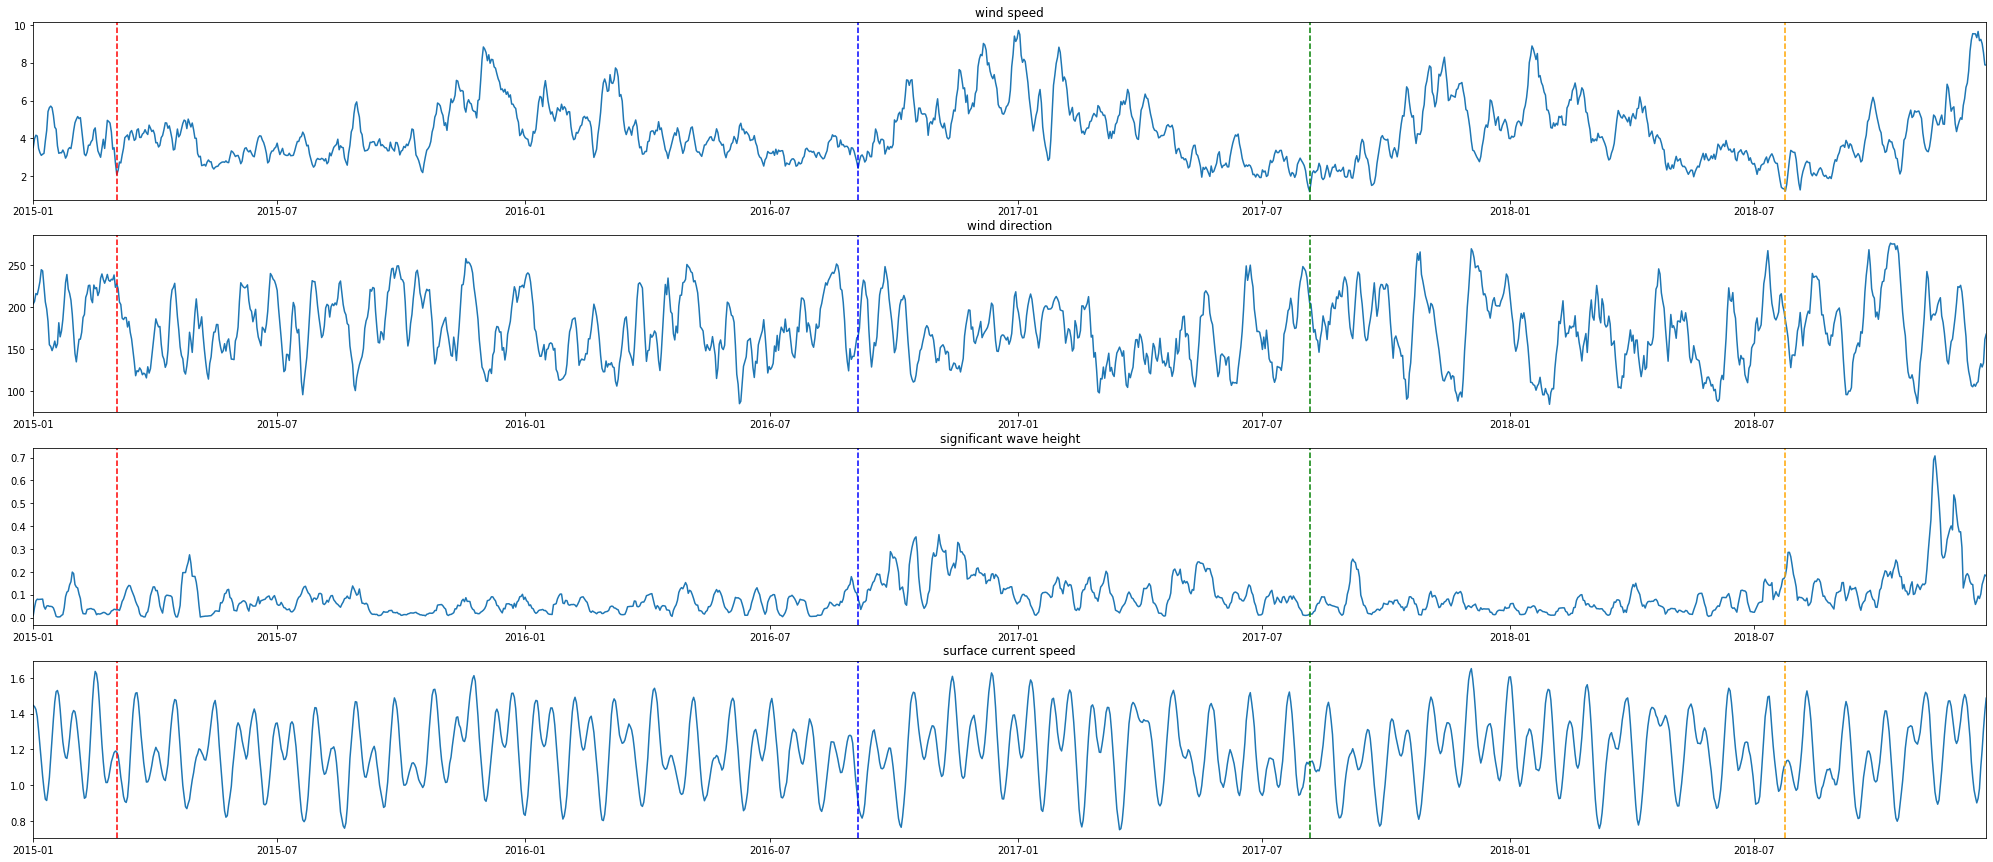

In [40]:
fig, ax = plt.subplots(4,1, figsize = (35,15))
ax[0].plot(dates, wnd_spd_avg)
ax[0].set_title('wind speed')

ax[1].plot(dates,wnd_dir_avg)
ax[1].set_title('wind direction')

ax[2].plot(dates, swh_avg)
ax[2].set_title('significant wave height')

ax[3].plot(dates,cur_avg)
ax[3].set_title('surface current speed')
for ax in ax:
    ax.set_xlim(dates[0], dates[-1])
    ax.axvline(datetime.date(2015,3,4), color='r', ls='--')
    ax.axvline(datetime.date(2016,9,4), color='b', ls='--');
    ax.axvline(datetime.date(2017,8,5), color='green', ls='--');
    ax.axvline(datetime.date(2018,7,24), color='orange', ls='--');
#fig.savefig('/home/vdo/Pictures/turn-choices.png', bbox_inches='tight');

In [27]:
mar0415 = pickle.load(open('/ocean/vdo/MIDOSS/04mar15.pkl', 'rb'))
sep0416 = pickle.load(open('/ocean/vdo/MIDOSS/04sep16.pkl', 'rb'))
aug0517 = pickle.load(open('/ocean/vdo/MIDOSS/05aug17.pkl', 'rb'))
jul2418 = pickle.load(open('/ocean/vdo/MIDOSS/24jul18.pkl', 'rb'))

In [28]:
mar0415['swh'].shape

(192,)

In [32]:
wnd_spd15, wnd_dir15 = wind_tools.wind_speed_dir(mar0415['uwinds'], mar0415['vwinds'])
wnd_spd16, wnd_dir16 = wind_tools.wind_speed_dir(sep0416['uwinds'], sep0416['vwinds'])
wnd_spd17, wnd_dir17 = wind_tools.wind_speed_dir(aug0517['uwinds'], aug0517['vwinds'])
wnd_spd18, wnd_dir18 = wind_tools.wind_speed_dir(jul2418['uwinds'], jul2418['vwinds'])

cur_spd15, cur_dir15 = wind_tools.wind_speed_dir(mar0415['ucurr'], mar0415['vcurr'])
cur_spd16, cur_dir16 = wind_tools.wind_speed_dir(sep0416['ucurr'], sep0416['vcurr'])
cur_spd17, cur_dir17 = wind_tools.wind_speed_dir(aug0517['ucurr'], aug0517['vcurr'])
cur_spd18, cur_dir18 = wind_tools.wind_speed_dir(jul2418['ucurr'], jul2418['vcurr'])

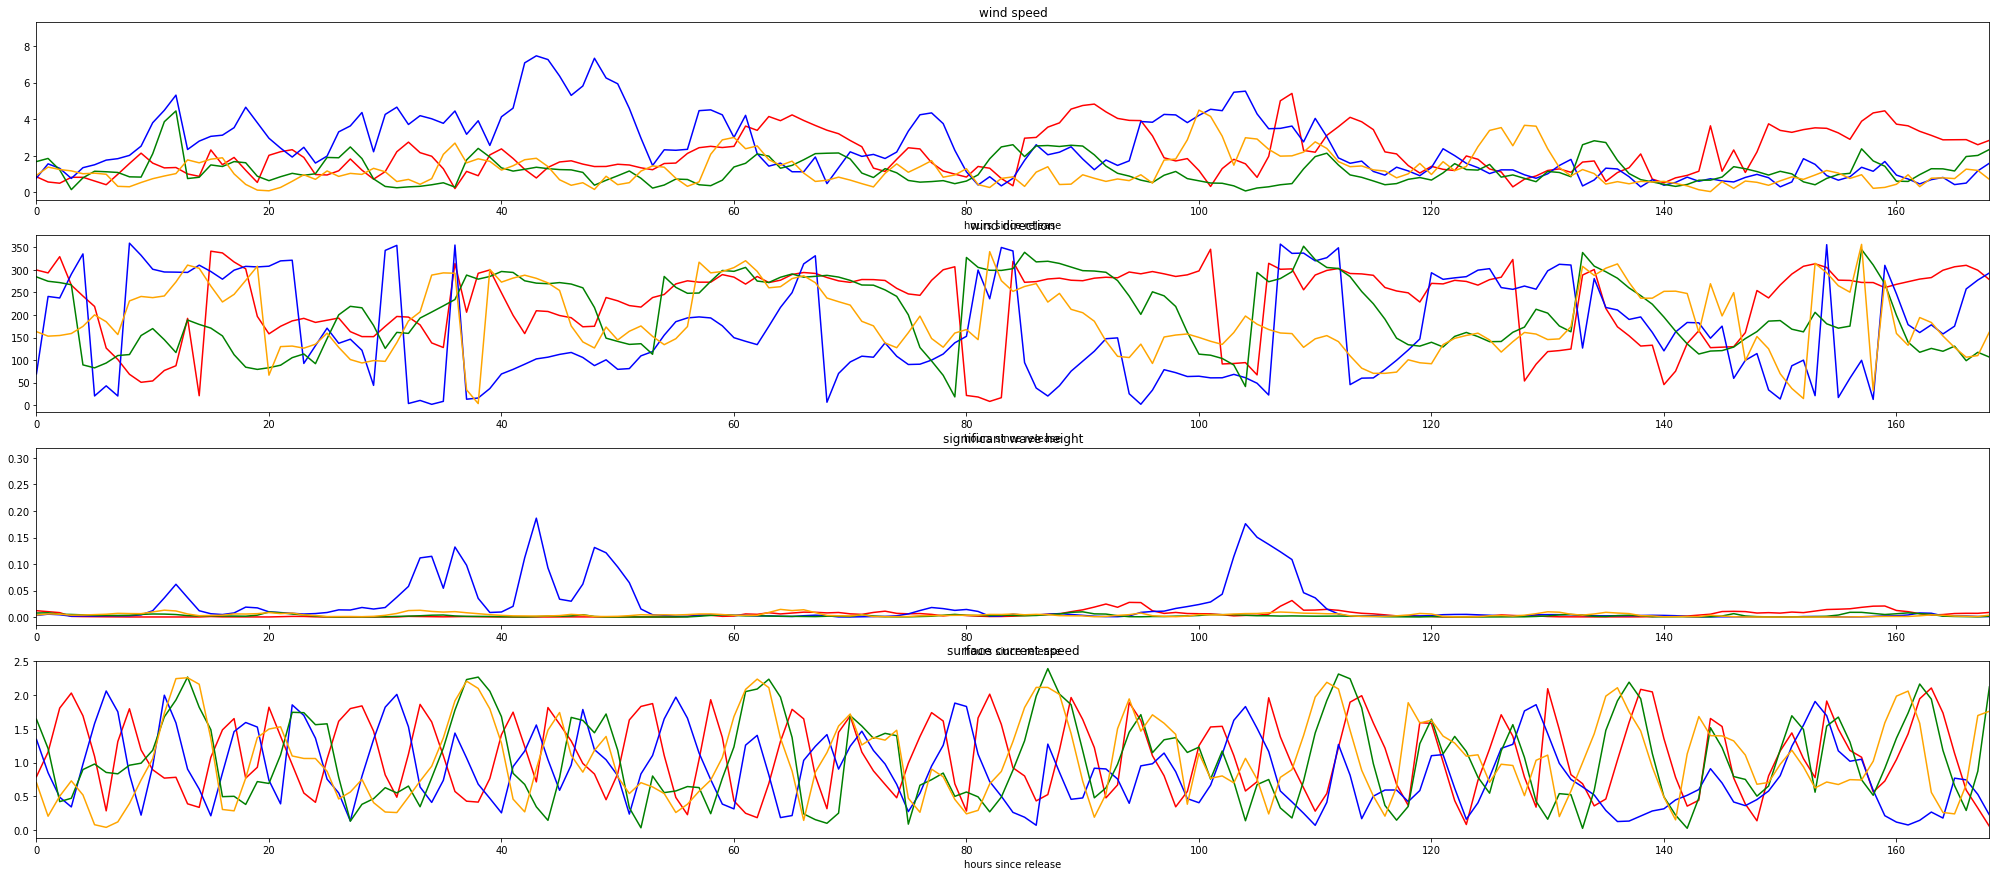

In [41]:
fig, ax = plt.subplots(4,1, figsize = (35,15))

ax[0].plot(wnd_spd15, 'r')
ax[0].plot(wnd_spd16, 'b')
ax[0].plot(wnd_spd17, 'green')
ax[0].plot(wnd_spd18, 'orange')
ax[0].set_title('wind speed')

ax[1].plot(wnd_dir15, 'r')
ax[1].plot(wnd_dir16, 'b')
ax[1].plot(wnd_dir17, 'green')
ax[1].plot(wnd_dir18, 'orange')
ax[1].set_title('wind direction')

ax[2].plot(mar0415['swh'], 'r')
ax[2].plot(sep0416['swh'], 'b')
ax[2].plot(aug0517['swh'], 'green')
ax[2].plot(jul2418['swh'], 'orange')
ax[2].set_title('significant wave height')

ax[3].plot(cur_spd15, 'r')
ax[3].plot(cur_spd16, 'b')
ax[3].plot(cur_spd17, 'green')
ax[3].plot(cur_spd18, 'orange')
ax[3].set_title('surface current speed')

for a in ax:
    a.set_xlim(0, 168)
    a.set_xlabel('hours since release')

In [42]:
f0 = nc.Dataset('/ocean/vdo/MIDOSS/results/winds/Lagrangian_AKNS_crude-0_TP_low-0.nc')
f1 = nc.Dataset('/ocean/vdo/MIDOSS/results/winds/Lagrangian_AKNS_crude-1_TP_low-1.nc')
f2 = nc.Dataset('/ocean/vdo/MIDOSS/results/winds/Lagrangian_AKNS_crude-2_TP_low-2.nc')
f3 = nc.Dataset('/ocean/vdo/MIDOSS/results/winds/Lagrangian_AKNS_crude-3_TP_low-3.nc')

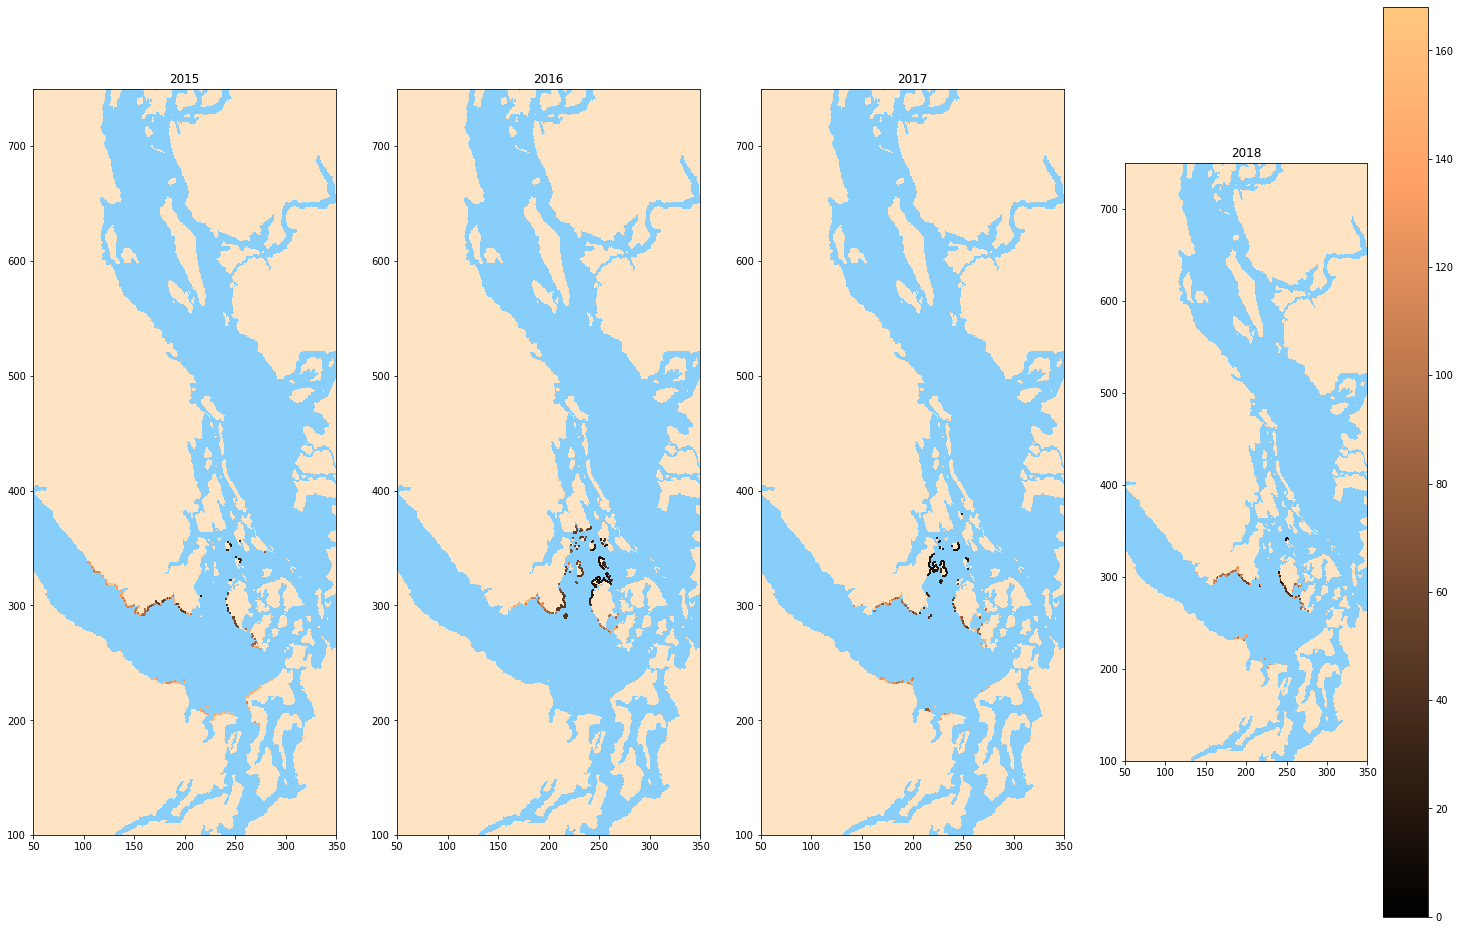

In [48]:
fig, ax = plt.subplots(1,4, figsize = (25,25))
for a in ax.flatten():
    a.pcolormesh(bathy.mask[1:-1, 1:-1], cmap = cmap2)
ax[0].set_title("2015")
ax[1].set_title("2016")
ax[2].set_title("2017")
ax[3].set_title("2018")
ax[0].pcolormesh(np.ma.masked_equal(f0['Beaching_Time'][:,:], 0), vmin = 0, vmax = 168, cmap = 'copper')
ax[1].pcolormesh(np.ma.masked_equal(f1['Beaching_Time'][:,:], 0), vmin = 0, vmax = 168, cmap = 'copper')
ax[2].pcolormesh(np.ma.masked_equal(f2['Beaching_Time'][:,:], 0), vmin = 0, vmax = 168, cmap = 'copper')
mesh = ax[3].pcolormesh(np.ma.masked_equal(f3['Beaching_Time'][:,:], 0), vmin = 0, vmax = 168, cmap = 'copper')
fig.colorbar(mesh, ax=ax[3])
for a in ax:
    viz_tools.set_aspect(a)
    a.set_xlim(50,350)
    a.set_ylim(100,750)

In [49]:
f0lessthanone = f0['Beaching_Time'][:,:]
f0lessthanone[(f0lessthanone <= 24) & (f0lessthanone > 0)] = 1
f0lessthanone[(f0lessthanone > 24) | (f0lessthanone == 0)] = 0

f1lessthanone = f1['Beaching_Time'][:,:]
f1lessthanone[(f1lessthanone <= 24) & (f1lessthanone > 0)] = 1
f1lessthanone[(f1lessthanone > 24) | (f1lessthanone == 0)] = 0

f2lessthanone = f2['Beaching_Time'][:,:]
f2lessthanone[(f2lessthanone <= 24) & (f2lessthanone > 0)] = 1
f2lessthanone[(f2lessthanone > 24) | (f2lessthanone == 0)] = 0

f3lessthanone = f3['Beaching_Time'][:,:]
f3lessthanone[(f3lessthanone <= 24) & (f3lessthanone > 0)] = 1
f3lessthanone[(f3lessthanone > 24) | (f3lessthanone == 0)] = 0

problessthanone = (f0lessthanone+f1lessthanone+f2lessthanone+f3lessthanone)/4

f0lessthanthree = f0['Beaching_Time'][:,:]
f0lessthanthree[(f0lessthanthree <= 72) & (f0lessthanthree > 0)] = 1
f0lessthanthree[(f0lessthanthree > 72) | (f0lessthanthree == 0)] = 0

f1lessthanthree = f1['Beaching_Time'][:,:]
f1lessthanthree[(f1lessthanthree <= 72) & (f1lessthanthree > 0)] = 1
f1lessthanthree[(f1lessthanthree > 72) | (f1lessthanthree == 0)] = 0

f2lessthanthree = f2['Beaching_Time'][:,:]
f2lessthanthree[(f2lessthanthree <= 72) & (f2lessthanthree > 0)] = 1
f2lessthanthree[(f2lessthanthree > 72) | (f2lessthanthree == 0)] = 0

f3lessthanthree = f3['Beaching_Time'][:,:]
f3lessthanthree[(f3lessthanthree <= 72) & (f3lessthanthree > 0)] = 1
f3lessthanthree[(f3lessthanthree > 72) | (f3lessthanthree == 0)] = 0

problessthanthree = (f0lessthanthree+f1lessthanthree+f2lessthanthree+f3lessthanthree)/4

f0lessthanseven = f0['Beaching_Time'][:,:]
f0lessthanseven[(f0lessthanseven <= 168) & (f0lessthanseven > 0)] = 1
f0lessthanseven[(f0lessthanseven > 168) | (f0lessthanseven == 0)] = 0

f1lessthanseven = f1['Beaching_Time'][:,:]
f1lessthanseven[(f1lessthanseven <= 168) & (f1lessthanseven > 0)] = 1
f1lessthanseven[(f1lessthanseven > 168) | (f1lessthanseven == 0)] = 0

f2lessthanseven = f2['Beaching_Time'][:,:]
f2lessthanseven[(f2lessthanseven <= 168) & (f2lessthanseven > 0)] = 1
f2lessthanseven[(f2lessthanseven > 168) | (f2lessthanseven == 0)] = 0

f3lessthanseven = f3['Beaching_Time'][:,:]
f3lessthanseven[(f3lessthanseven <= 168) & (f3lessthanseven > 0)] = 1
f3lessthanseven[(f3lessthanseven > 168) | (f3lessthanseven == 0)] = 0

problessthanseven = (f0lessthanseven+f1lessthanseven+f2lessthanseven+f3lessthanseven)/4

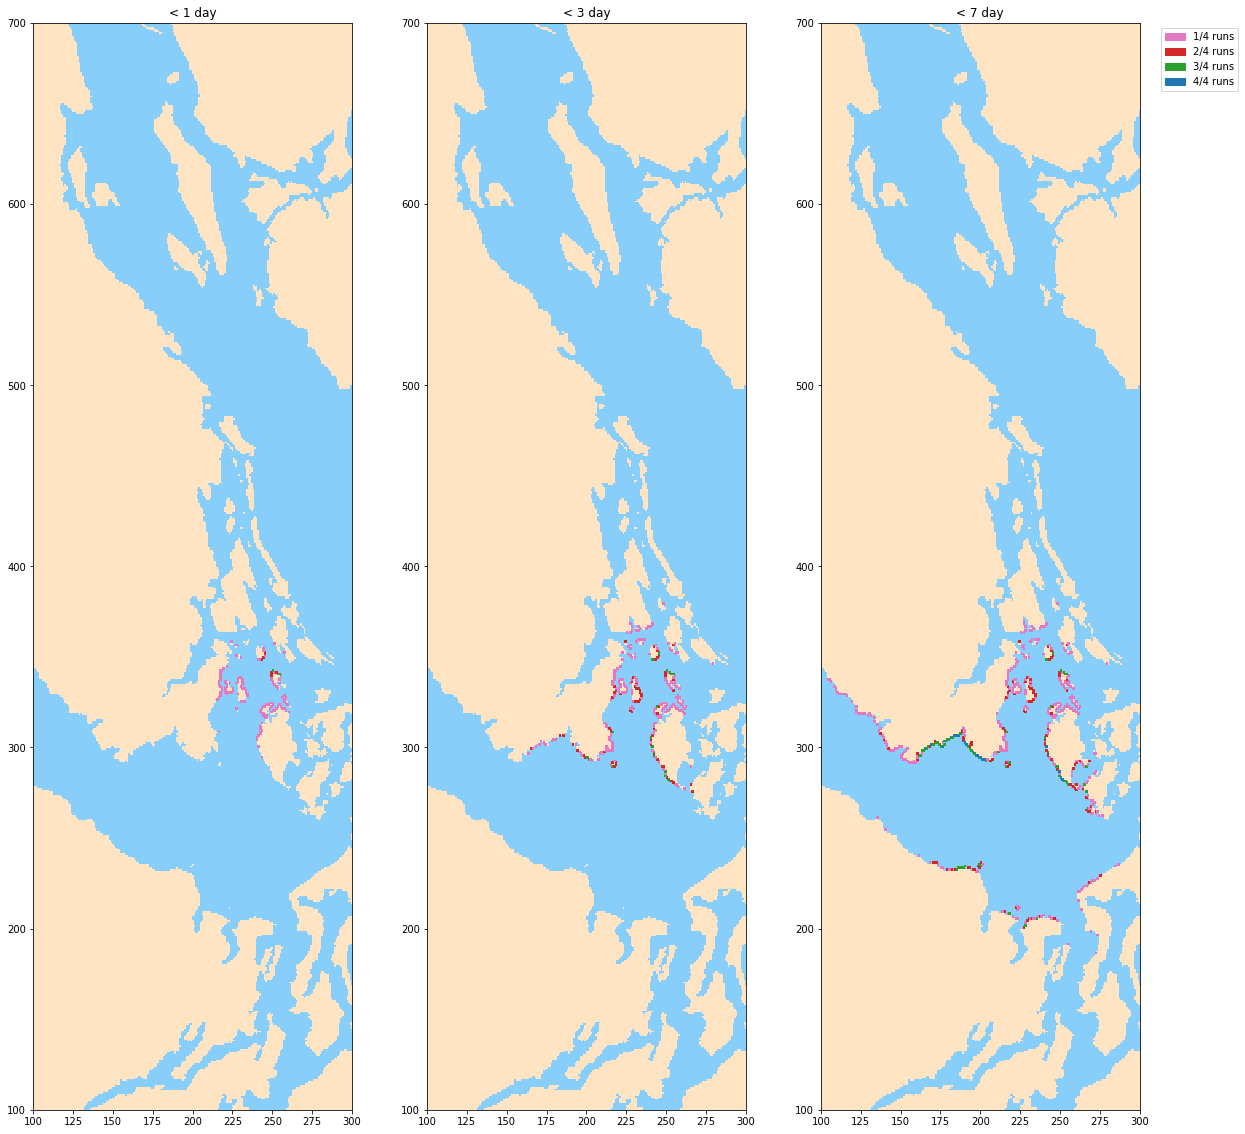

In [54]:
fig, ax = plt.subplots(1,3, figsize = (20,20))

for a in ax:
    a.pcolormesh(bathy.mask[1:-1, 1:-1], cmap = cmap2)

ax[0].pcolormesh(np.ma.masked_equal(problessthanone,0), vmin = 0, vmax = 1, cmap = cmap)
ax[1].pcolormesh(np.ma.masked_equal(problessthanthree,0), vmin = 0, vmax = 1, cmap = cmap)
ax[2].pcolormesh(np.ma.masked_equal(problessthanseven,0), vmin = 0, vmax = 1, cmap = cmap)

ax[0].set_title('< 1 day')
ax[1].set_title('< 3 day')
ax[2].set_title('< 7 day')

plt.legend(handles=[green_patch, red_patch, yellow_patch, blue_patch], 
       bbox_to_anchor=(1.05, 1), loc='upper left')

for a in ax:
    viz_tools.set_aspect(a)
    a.set_ylim(100, 700);
    a.set_xlim(100, 300);

In [55]:
def load_sro(filepath):
    with open(filepath, 'r') as the_file:
        all_data = [line.strip() for line in the_file.readlines()]
        header = all_data[4]  

    # Order header into list array by splitting up string
    header_arr = []
    header_arr = header.split(' ')
    # Remove emtpy entries from list
    header_arr = np.asarray([x for x in header_arr if x != ''])
    
    data2D = np.genfromtxt(filepath, skip_header=6, skip_footer=4)
    
    return header_arr, data2D

In [56]:
header, f0data = load_sro('/ocean/vdo/MIDOSS/results/TP_low_2020-02-08T003757/results/TP_low-0/resOilOutput.sro')
header, f1data = load_sro('/ocean/vdo/MIDOSS/results/TP_low_2020-02-08T003757/results/TP_low-1/resOilOutput.sro')
header, f2data = load_sro('/ocean/vdo/MIDOSS/results/TP_low_2020-02-08T003757/results/TP_low-2/resOilOutput.sro')
header, f3data = load_sro('/ocean/vdo/MIDOSS/results/TP_low_2020-02-08T003757/results/TP_low-3/resOilOutput.sro')

In [57]:
n=0
for item in header:
    print(str(n), item)
    n=n+1

0 Seconds
1 YY
2 MM
3 DD
4 hh
5 mm
6 ss
7 MassOil
8 VolOilBeached
9 VolumeBeached
10 VolumeOil
11 Volume
12 Area
13 TeoricalArea
14 Thickness
15 MEvaporated
16 VEvaporated
17 FMEvaporated
18 MDispersed
19 VDispersed
20 FMDispersed
21 MSedimented
22 VSedimented
23 FMSedimented
24 MDissolved
25 VDissolved
26 FMDissolved
27 MChemDisp
28 VChemDisp
29 FMChemDisp
30 MOilRecovered
31 VOilRecovered
32 FMOilRecovered
33 MWaterContent
34 VWaterContent
35 Density
36 Viscosity
37 MBio
38 VBio
39 FMBio
40 CharacteristicDiameter
41 P_Star
42 AnalyteMass1
43 AnalyteMass2
44 AnalyteMass3
45 AnalyteMass4
46 AnalyteMass5
47 AnalyteBio1
48 AnalyteBio2
49 AnalyteBio3
50 AnalyteBio4
51 AnalyteBio5


In [63]:
f0data[:,8].shape

(168,)

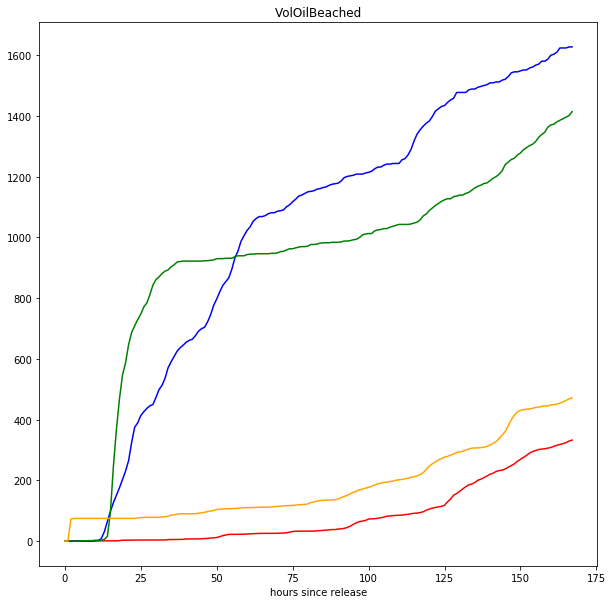

In [66]:
fig, ax = plt.subplots(figsize = (10,10))
ax.plot(f0data[:,8], 'r')
ax.plot(f1data[:,8], 'b')
ax.plot(f2data[:,8], 'green')
ax.plot(f3data[:,8], 'orange')
ax.set_title('VolOilBeached')
ax.set_xlabel('hours since release');

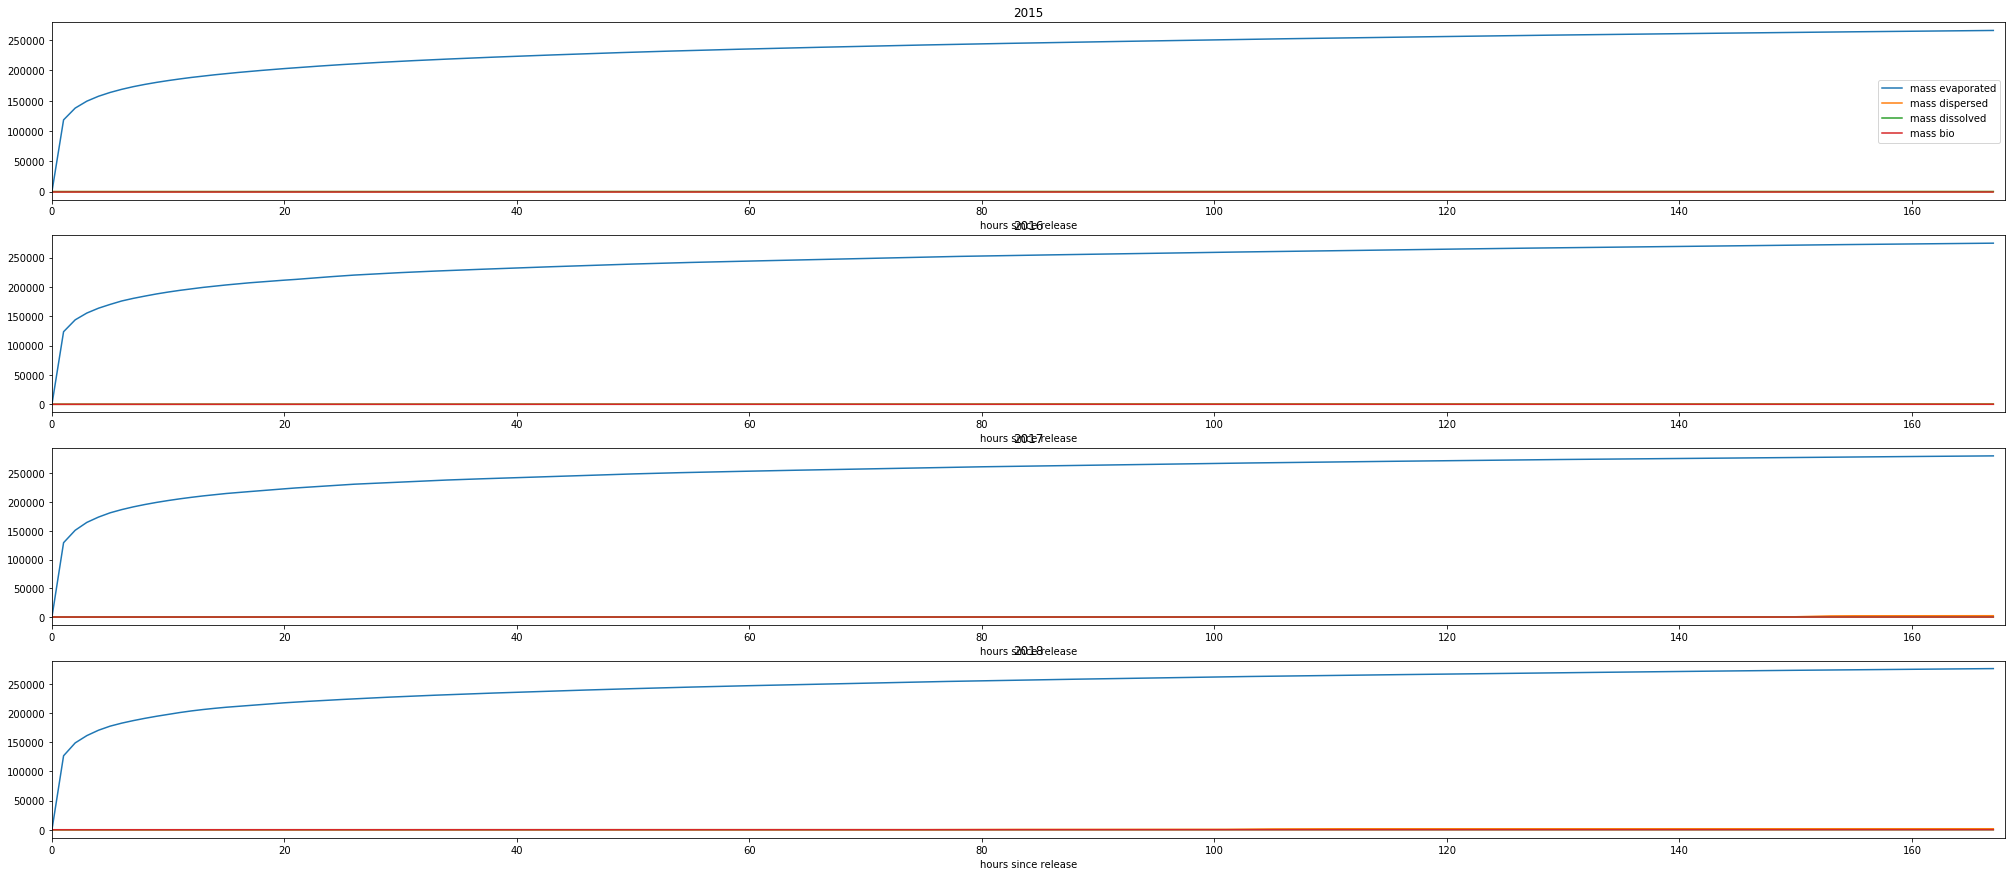

In [69]:
fig, ax = plt.subplots(4,1, figsize = (35,15))

ax[0].plot(f0data[:,15], label = 'mass evaporated')
ax[0].plot(f0data[:,18], label = 'mass dispersed')
ax[0].plot(f0data[:,24], label = 'mass dissolved')
ax[0].plot(f0data[:,37], label = 'mass bio')
ax[0].set_title('2015')
ax[0].legend()

ax[1].plot(f1data[:,15], label = 'mass evaporated')
ax[1].plot(f1data[:,18], label = 'mass dispersed')
ax[1].plot(f1data[:,24], label = 'mass dissolved')
ax[1].plot(f1data[:,37], label = 'mass bio')
ax[1].set_title('2016')

ax[2].plot(f2data[:,15], label = 'mass evaporated')
ax[2].plot(f2data[:,18], label = 'mass dispersed')
ax[2].plot(f2data[:,24], label = 'mass dissolved')
ax[2].plot(f2data[:,37], label = 'mass bio')
ax[2].set_title('2017')

ax[3].plot(f3data[:,15], label = 'mass evaporated')
ax[3].plot(f3data[:,18], label = 'mass dispersed')
ax[3].plot(f3data[:,24], label = 'mass dissolved')
ax[3].plot(f3data[:,37], label = 'mass bio')
ax[3].set_title('2018')

for a in ax:
    a.set_xlim(0, 168)
    a.set_xlabel('hours since release')

In [75]:
f0['Thickness_2D']

<class 'netCDF4._netCDF4.Variable'>
int32 Thickness_2D(time, grid_y, grid_x)
    _FillValue: -9999
    standard_name: Thickness_2D
    long_name: Thickness_2D
    units: microns
    scale_factor: 0.0001
unlimited dimensions: time
current shape = (168, 896, 396)
filling on

In [73]:
np.sum(f0['Thickness_2D'][:], axis=0).max()

1718.1507000000004

In [74]:
np.sum(f0['Thickness_2D'][:], axis=0).min()

-214724.6221

In [78]:
cmap3 = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'white'),
                                                    (0.85 / vmax, 'white'),
                                                    (0.850001 / vmax, 'bisque'),
                                                    (1 / vmax, 'bisque')]
                                        )

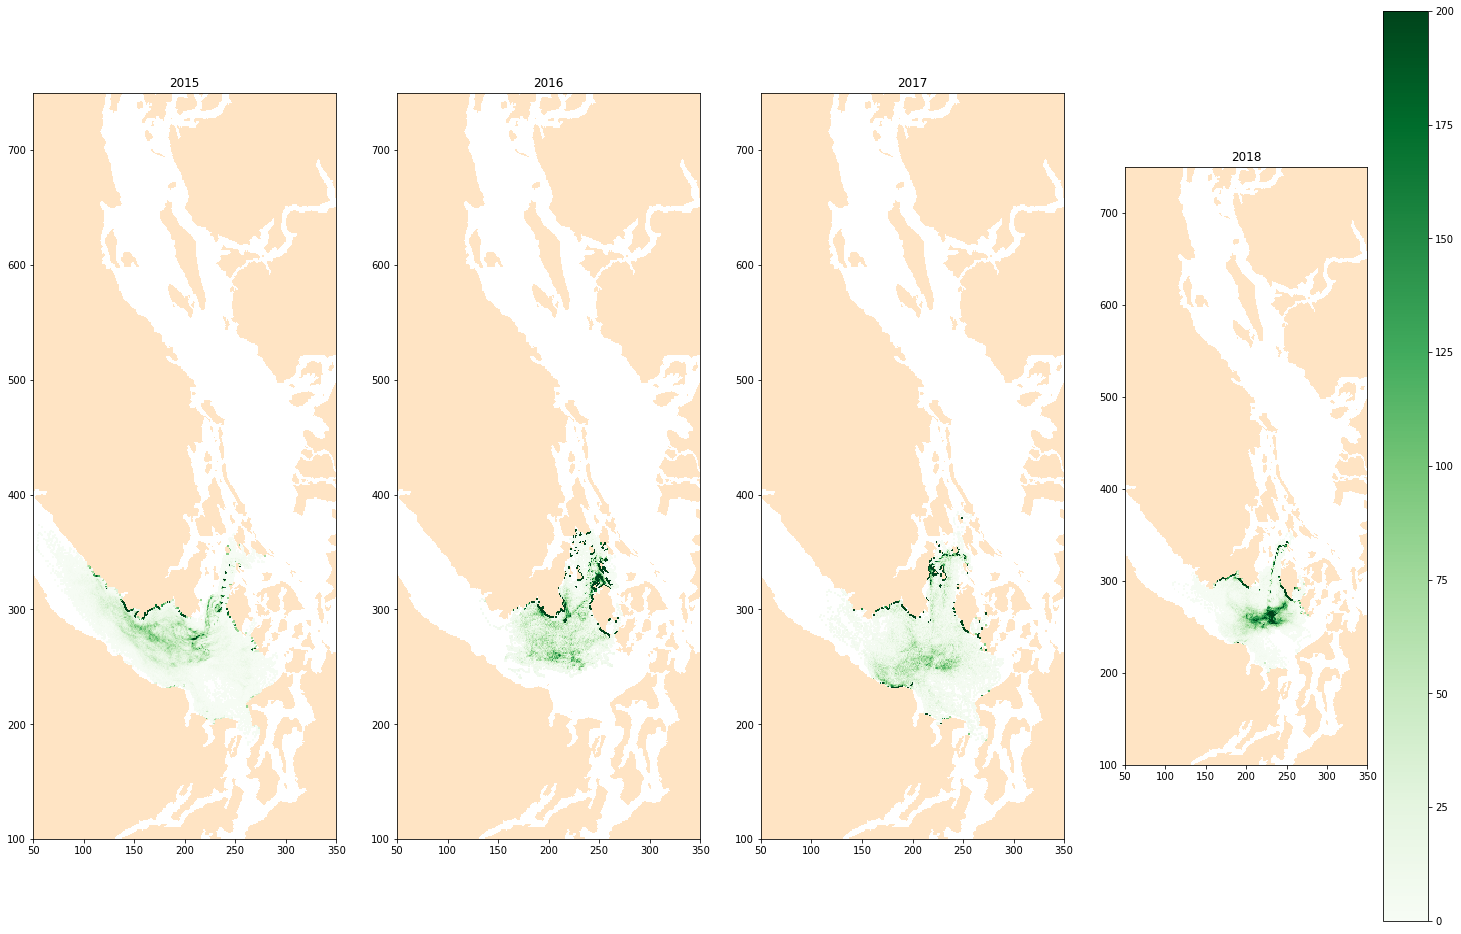

In [88]:
fig, ax = plt.subplots(1,4, figsize = (25,25))
for a in ax.flatten():
    a.pcolormesh(bathy.mask[1:-1, 1:-1], cmap = cmap3)
ax[0].set_title("2015")
ax[1].set_title("2016")
ax[2].set_title("2017")
ax[3].set_title("2018")

ax[0].pcolormesh(np.ma.masked_equal(np.sum(f0['Thickness_2D'][:], axis=0), 0), vmin = 0, vmax = 200, cmap = 'Greens')
ax[1].pcolormesh(np.ma.masked_equal(np.sum(f1['Thickness_2D'][:], axis=0), 0), vmin = 0, vmax = 200, cmap = 'Greens')
ax[2].pcolormesh(np.ma.masked_equal(np.sum(f2['Thickness_2D'][:], axis=0), 0), vmin = 0, vmax = 200, cmap = 'Greens')
mesh = ax[3].pcolormesh(np.ma.masked_equal(np.sum(f3['Thickness_2D'][:], axis=0), 0), vmin = 0, vmax = 200, cmap = 'Greens')
fig.colorbar(mesh, ax=ax[3])
for a in ax:
    viz_tools.set_aspect(a)
    a.set_xlim(50,350)
    a.set_ylim(100,750)

geo_tools.find_closest_model_point(-122.97, 48.77, 
                                   (np.reshape(f['longitude'][:], (1,572)) * np.ones((661,572)))-360,
                                  np.reshape(f['latitude'][:], (661,1)) * np.ones((661,572)))